In [1]:
import numpy as np # Pour la manipulation de tableaux
from keras.applications import  resnet50
from sklearn import metrics 
import os

import pandas as pd # Pour manipuler des DataFrames pandas

import matplotlib.pyplot as plt # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur
%matplotlib inline

from keras.models import Sequential # Pour construire un réseau de neurones
from keras.layers import Dense, Conv2D # Pour instancier une couche dense
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Activation,GlobalAveragePooling2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Model
import cv2
import keras
from numpy.random import seed
import tensorflow

from keras.preprocessing.image import ImageDataGenerator
import itertools # Pour créer des iterateurs

from sklearn import linear_model, preprocessing 



%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
import time, cv2
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split

from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras import backend as K
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import preprocess_input


Using TensorFlow backend.


In [2]:
#Paramètres
base_img_paths="/home/marcpozzo/Desktop/c3po/Images_aquises/"
generateur_path='/mnt/VegaSlowDataDisk/c3po/Images_aquises/generateur_bigger.csv'
#generateur_path='/mnt/VegaSlowDataDisk/c3po/Chaine_de_traitement/Train_imagettes_annotées/type_oiseau/Materiel/generateur.csv'
test_size=0.1
epochs=200
batch_size = 600
zoom_range = 1.25
horizontal_flip = True
Minimum_Number_Class=100
dropout_rate=0.5
#steps_per_epoch=len(data_train)//batch_size
steps_per_epoch=1
#validation_steps=len(data_test)//batch_size
validation_steps=1


In [3]:
#df=pd.read_csv("/home/marcpozzo/Desktop/c3po/Images_aquises/generateur.csv")
df=pd.read_csv(generateur_path)
df.drop('labels',inplace=True,axis=1)
df.shape
df[df["img_paths"]=='Rec_images_bigger/EK000414_3_pigeon_178.JPG']

,class,img_paths


In [4]:
df["class"].unique()
for c in df:
    print(''+c+':',len(df[c].unique()))
df["class"].unique()

class: 13
img_paths: 6220


array(['oiseau', 'autre', 'corneille', 'pigeon', 'pie', 'chat', 'abeille',
       'chevreuil', 'lapin', 'faisan', 'w', 'sanglier', 'cheval'],
      dtype=object)

In [5]:
All_Unique=df["class"].unique()
Utilisable=[]
for i in df["class"].unique():
    if df["class"][df["class"]==i].count()>Minimum_Number_Class:
        Utilisable.append(i)
Utilisable
Non_Utilisable=set(All_Unique)-set(Utilisable)
Non_Utilisable
for i in Non_Utilisable:
    df=df[df["class"]!=i]
df=df[df["class"]!="oiseau"]  
df["class"].unique()

array(['autre', 'corneille', 'pigeon', 'chevreuil', 'lapin', 'faisan'],
      dtype=object)

In [6]:

for i in range(len(df["class"])):
    image_name=df["img_paths"].iloc[i]
    df["img_paths"].iloc[i]=os.path.join(base_img_paths,image_name)
    
df.shape
df[df["img_paths"]=='/home/marcpozzo/Desktop/c3po/Images_aquises/Rec_images_bigger/EK000414_3_pigeon_178.JPG']

,class,img_paths


In [7]:
df["class"].unique()

array(['autre', 'corneille', 'pigeon', 'chevreuil', 'lapin', 'faisan'],
      dtype=object)

In [8]:
seed(1)
tensorflow.random.set_seed(2)

data_train,data_test= train_test_split(df,stratify=df["class"], test_size=test_size,random_state=42)
train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        # data augmentation
        rotation_range = 10,
        zoom_range = zoom_range,
        horizontal_flip = horizontal_flip
        )

test_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input)




train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)


test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)
print(5369+597)

Found 5369 validated image filenames belonging to 6 classes.
Found 597 validated image filenames belonging to 6 classes.
5966


Epoch 1/200
8/8 [==============================] - 92s 11s/step - loss: 8.4873 - accuracy: 0.3344 - val_loss: 1.9954 - val_accuracy: 0.5276
Epoch 2/200
8/8 [==============================] - 16s 2s/step - loss: 2.0066 - accuracy: 0.4106 - val_loss: 1.6756 - val_accuracy: 0.5427
Epoch 3/200
8/8 [==============================] - 7s 913ms/step - loss: 1.7174 - accuracy: 0.5181 - val_loss: 1.6609 - val_accuracy: 0.5578
Epoch 4/200
8/8 [==============================] - 8s 977ms/step - loss: 1.6744 - accuracy: 0.5553 - val_loss: 1.6184 - val_accuracy: 0.5678
Epoch 5/200
8/8 [==============================] - 8s 1s/step - loss: 1.6212 - accuracy: 0.5710 - val_loss: 1.5370 - val_accuracy: 0.6281
Epoch 6/200
8/8 [==============================] - 7s 905ms/step - loss: 1.5629 - accuracy: 0.5880 - val_loss: 1.4708 - val_accuracy: 0.6415
Epoch 7/200
8/8 [==============================] - 8s 982ms/step - loss: 1.5261 - accuracy: 0.5917 - val_loss: 1.4330 - val_accuracy: 0.6382
Epoch 8/200
8/8 [==

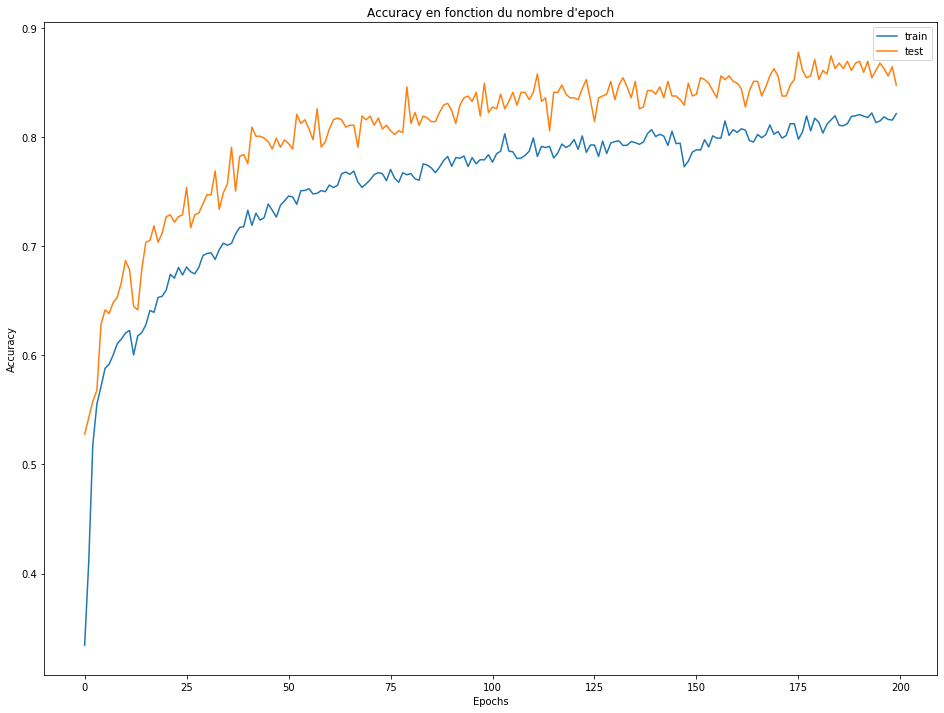

In [9]:
lenet = Sequential()

conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))

flatten = Flatten()

dropout = Dropout(rate = dropout_rate)

dense_1 = Dense(units = 128,
                activation = 'relu')

dense_2 = Dense(units = 6,
                activation = 'softmax')

lenet.add(conv_1)
lenet.add(max_pool_1)
lenet.add(conv_2)
lenet.add(max_pool_2)
lenet.add(dropout)
lenet.add(flatten)
lenet.add(dense_1)
lenet.add(dense_2)

# Compilation
lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation




history=lenet.fit_generator( train_generator,
                           steps_per_epoch=len(data_train)//batch_size,
                           epochs=epochs,
                           workers=-1,
                           validation_data=test_generator,
                           validation_steps=len(data_test)//batch_size)
                          


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();
#drop_out.50

In [10]:
lenet.save("drop_out.50")

In [ ]:
## Sans aucune transfo maintenant

In [12]:
seed(1)
tensorflow.random.set_seed(2)

data_train,data_test= train_test_split(df,stratify=df["class"], test_size=test_size,random_state=42)
train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input)

test_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input)




train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)


test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory="",
                                                           x_col = "img_paths",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)

Found 5369 validated image filenames belonging to 6 classes.
Found 597 validated image filenames belonging to 6 classes.


Epoch 1/200
8/8 [==============================] - 3s 430ms/step - loss: 6.7733 - accuracy: 0.3673 - val_loss: 1.7420 - val_accuracy: 0.5511
Epoch 2/200
8/8 [==============================] - 3s 428ms/step - loss: 1.8156 - accuracy: 0.5580 - val_loss: 1.0961 - val_accuracy: 0.6683
Epoch 3/200
8/8 [==============================] - 4s 439ms/step - loss: 1.1305 - accuracy: 0.6534 - val_loss: 0.9894 - val_accuracy: 0.7052
Epoch 4/200
8/8 [==============================] - 3s 427ms/step - loss: 1.0157 - accuracy: 0.6844 - val_loss: 0.8823 - val_accuracy: 0.7437
Epoch 5/200
8/8 [==============================] - 3s 423ms/step - loss: 0.9020 - accuracy: 0.7201 - val_loss: 0.7753 - val_accuracy: 0.7538
Epoch 6/200
8/8 [==============================] - 3s 399ms/step - loss: 0.7819 - accuracy: 0.7677 - val_loss: 0.7380 - val_accuracy: 0.7806
Epoch 7/200
8/8 [==============================] - 3s 421ms/step - loss: 0.7108 - accuracy: 0.7847 - val_loss: 0.6887 - val_accuracy: 0.7906
Epoch 8/200
8

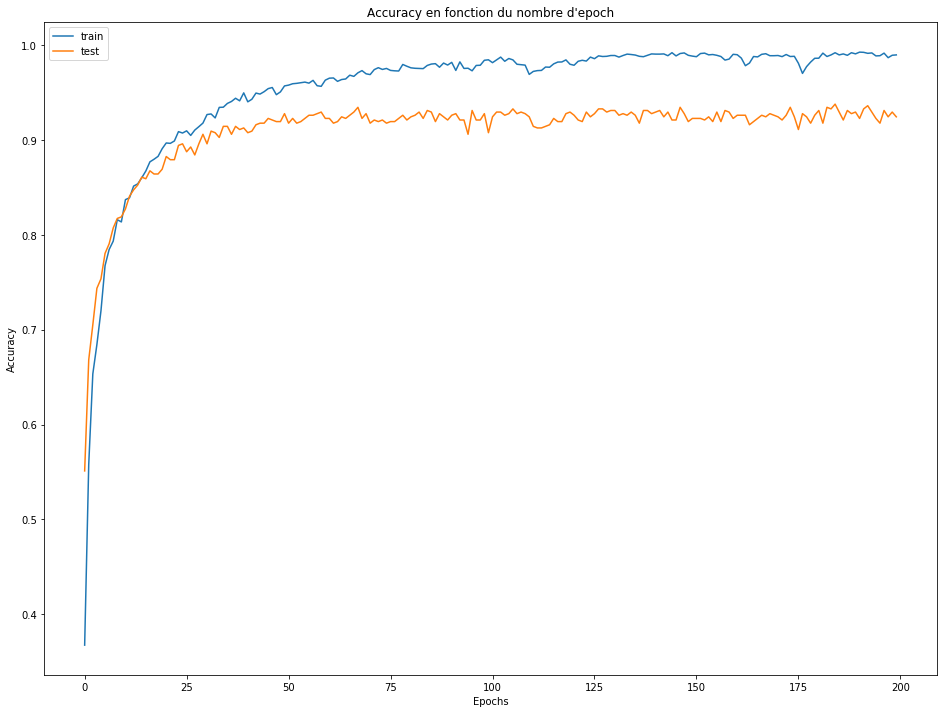

In [13]:
lenet = Sequential()

conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))

flatten = Flatten()

dropout = Dropout(rate = dropout_rate)

dense_1 = Dense(units = 128,
                activation = 'relu')

dense_2 = Dense(units = 6,
                activation = 'softmax')

lenet.add(conv_1)
lenet.add(max_pool_1)
lenet.add(conv_2)
lenet.add(max_pool_2)
lenet.add(dropout)
lenet.add(flatten)
lenet.add(dense_1)
lenet.add(dense_2)

# Compilation
lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation




history=lenet.fit_generator( train_generator,
                           steps_per_epoch=len(data_train)//batch_size,
                           epochs=epochs,
                           workers=-1,
                           validation_data=test_generator,
                           validation_steps=len(data_test)//batch_size)
                          


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();

lenet.save("200_ep_sans_transfo")

Epoch 1/200
8/8 [==============================] - 81s 10s/step - loss: 10.3624 - accuracy: 0.3892 - val_loss: 3.5573 - val_accuracy: 0.5963
Epoch 2/200
8/8 [==============================] - 24s 3s/step - loss: 2.7649 - accuracy: 0.4848 - val_loss: 1.5625 - val_accuracy: 0.5477
Epoch 3/200
8/8 [==============================] - 4s 445ms/step - loss: 1.4339 - accuracy: 0.5899 - val_loss: 1.1293 - val_accuracy: 0.6700
Epoch 4/200
8/8 [==============================] - 4s 467ms/step - loss: 1.2086 - accuracy: 0.6509 - val_loss: 0.9609 - val_accuracy: 0.7186
Epoch 5/200
8/8 [==============================] - 4s 460ms/step - loss: 1.0262 - accuracy: 0.6972 - val_loss: 0.8175 - val_accuracy: 0.7504
Epoch 6/200
8/8 [==============================] - 4s 451ms/step - loss: 0.8971 - accuracy: 0.7234 - val_loss: 0.7213 - val_accuracy: 0.7755
Epoch 7/200
8/8 [==============================] - 4s 442ms/step - loss: 0.7857 - accuracy: 0.7484 - val_loss: 0.6432 - val_accuracy: 0.7956
Epoch 8/200
8/8

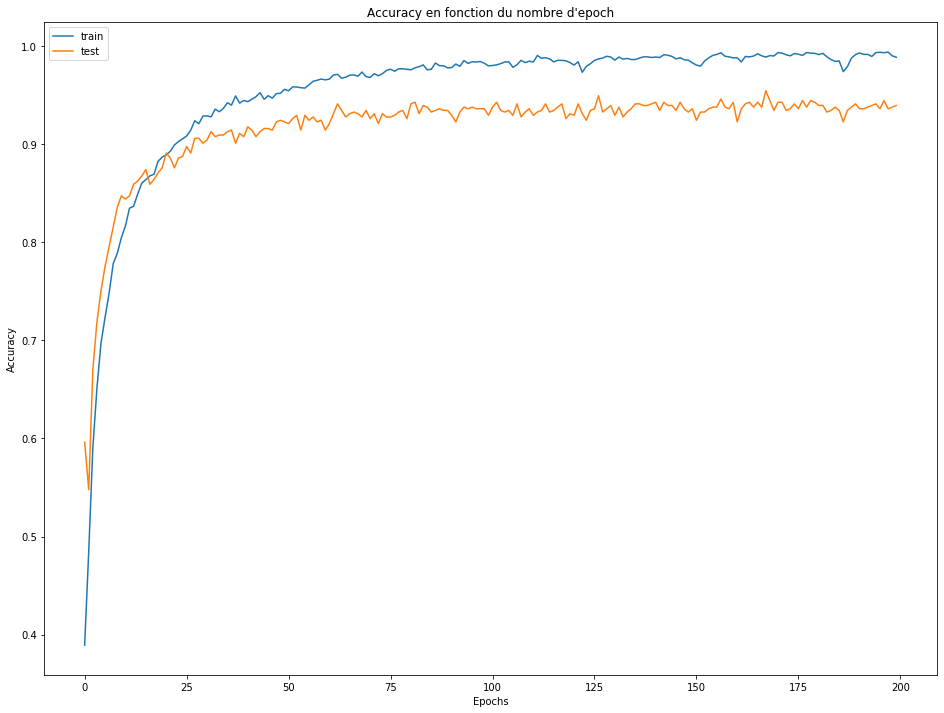

In [14]:
lenet = Sequential()

conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 3),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))

flatten = Flatten()

dropout = Dropout(rate = dropout_rate)

dense_1 = Dense(units = 128,
                activation = 'relu')

dense_2 = Dense(units = 6,
                activation = 'softmax')

lenet.add(conv_1)
lenet.add(max_pool_1)
lenet.add(conv_2)
lenet.add(max_pool_2)
lenet.add(dropout)
lenet.add(flatten)
lenet.add(dense_1)
lenet.add(dense_2)

# Compilation
lenet.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation




history=lenet.fit_generator( train_generator,
                           steps_per_epoch=len(data_train)//batch_size,
                           epochs=epochs,
                           workers=-1,
                           validation_data=test_generator,
                           validation_steps=len(data_test)//batch_size)
                          


plt.figure(figsize=(16,12))

plt.plot(history.history['accuracy'],label="train");
plt.plot(history.history['val_accuracy'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();

lenet.save("200_ep_sans_transfo_bis")

## Ensuite avec des zooms et transfos

In [17]:
lenet.save("zoom_1.3")

Found 4773 validated image filenames belonging to 6 classes.
Found 1194 validated image filenames belonging to 6 classes.
800 batch_size
1 zoom_range
100 Minimum_Number_Class
0 dropout_rate
Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 19.8392 - accuracy: 0.0812 - val_loss: 9.9391 - val_accuracy: 0.5250
Epoch 2/200
1/1 [==============================] - 1s 714ms/step - loss: 9.1926 - accuracy: 0.5325 - val_loss: 6.2863 - val_accuracy: 0.5609
Epoch 3/200
1/1 [==============================] - 1s 984ms/step - loss: 6.9696 - accuracy: 0.5337 - val_loss: 7.9710 - val_accuracy: 0.1975
Epoch 4/200
1/1 [==============================] - 1s 705ms/step - loss: 7.6421 - accuracy: 0.2113 - val_loss: 6.6806 - val_accuracy: 0.2614
Epoch 5/200
1/1 [==============================] - 1s 933ms/step - loss: 6.9808 - accuracy: 0.2612 - val_loss: 4.8431 - val_accuracy: 0.4575
Epoch 6/200
1/1 [==============================] - 1s 703ms/step - loss: 4.6099 - accuracy: 0.4437 - val_lo

<Figure size 1152x864 with 0 Axes>

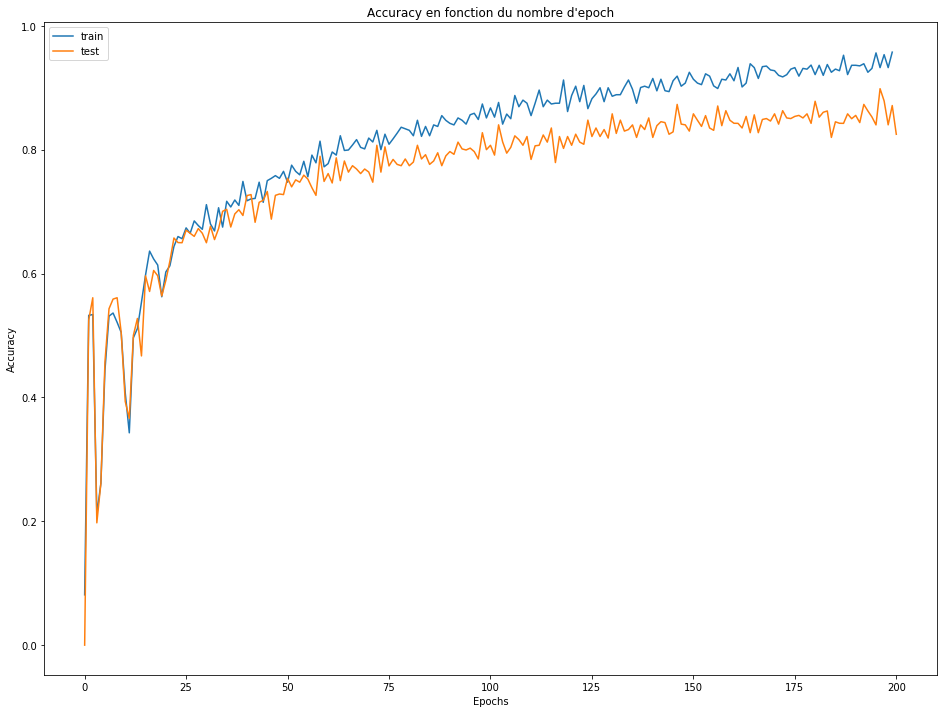

In [18]:
modelForPredict = Model(inputs=lenet.input, outputs=lenet.layers[-1].output)

In [59]:
probas = modelForPredict.predict_generator(train_generator)
estimated=probas.argmax(axis=1)
real = train_generator.classes

In [64]:
print(metrics.classification_report(estimated, real))
print(estimated)
print(probas)

              precision    recall  f1-score   support

           0       0.56      0.56      0.56      3080
           1       0.01      0.01      0.01       114
           2       0.18      0.17      0.18       996
           3       0.06      0.06      0.06       288
           4       0.03      0.03      0.03       130
           5       0.12      0.12      0.12       761

    accuracy                           0.37      5369
   macro avg       0.16      0.16      0.16      5369
weighted avg       0.38      0.37      0.37      5369

[5 0 0 ... 5 2 2]
[[1.2445042e-09 4.2108335e-28 3.4434608e-10 5.3720993e-07 1.0563923e-13
  9.9999940e-01]
 [9.9972421e-01 5.2115811e-06 2.2337589e-04 9.5451298e-07 3.3624518e-05
  1.2601153e-05]
 [9.9985039e-01 1.2680614e-18 2.1308075e-08 1.4936733e-04 1.8090527e-07
  4.4609386e-10]
 ...
 [6.2319914e-06 8.1361905e-12 1.5073383e-01 1.5477417e-05 2.1611224e-05
  8.4922284e-01]
 [3.9365897e-09 1.6658208e-24 1.0000000e+00 3.5307492e-09 5.7298947e-11
  1.68

In [61]:
comp = pd.DataFrame({"real": real, "estimates" : estimated})

data_crosstab = pd.crosstab(comp['real'], 
                            comp['estimates'],  
                               margins = True) 
print(data_crosstab)


estimates     0    1    2    3    4    5   All
real                                          
0          1721   67  584  180   73  450  3075
1            75    1   21    6    3   16   122
2           567   21  173   42   24  140   967
3           180    7   50   18    7   40   302
4            97    1   28    5    4   24   159
5           440   17  140   37   19   91   744
All        3080  114  996  288  130  761  5369


In [258]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C = 1.0)
lg.fit(X_train_features, y_train);
y_predict=lg.predict(X_test_features)
print(lg.score(X_test_features, y_test))
print(metrics.classification_report(y_test, y_predict))


/home/marcpozzo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/marcpozzo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9212730318257957
              precision    recall  f1-score   support

       autre       0.94      0.97      0.96       684
   chevreuil       0.96      0.85      0.90        27
   corneille       0.88      0.93      0.90       215
      faisan       0.87      0.81      0.84        67
       lapin       0.75      0.60      0.67        35
      pigeon       0.92      0.83      0.87       166

    accuracy                           0.92      1194
   macro avg       0.89      0.83      0.86      1194
weighted avg       0.92      0.92      0.92      1194



In [251]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(lg, open(filename, 'wb'))
 
# some time later...
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_features, y_test)
y_predict=loaded_model.predict(X_test_features)
print(lg.score(X_test_features, y_test))
print(metrics.classification_report(y_test, y_predict))


0.9212730318257957
              precision    recall  f1-score   support

       autre       0.94      0.97      0.96       684
   chevreuil       0.96      0.85      0.90        27
   corneille       0.88      0.93      0.90       215
      faisan       0.87      0.81      0.84        67
       lapin       0.75      0.60      0.67        35
      pigeon       0.92      0.83      0.87       166

    accuracy                           0.92      1194
   macro avg       0.89      0.83      0.86      1194
weighted avg       0.92      0.92      0.92      1194



In [264]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion = "entropy",max_depth = 30,random_state = 123)
dt_clf.fit(X_train_features, y_train);
y_predict=dt_clf.predict(X_test_features)
print(dt_clf.score(X_test_features, y_test))
print(metrics.classification_report(y_test, y_predict))

0.8492462311557789
              precision    recall  f1-score   support

       autre       0.92      0.92      0.92       684
   chevreuil       0.62      0.74      0.68        27
   corneille       0.78      0.88      0.83       215
      faisan       0.77      0.73      0.75        67
       lapin       0.45      0.43      0.44        35
      pigeon       0.80      0.67      0.73       166

    accuracy                           0.85      1194
   macro avg       0.72      0.73      0.72      1194
weighted avg       0.85      0.85      0.85      1194

